In [1]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

In [2]:
df = pd.read_csv('test3.csv')

Q3: Is there a correlation based on symptoms vs preexisting conditions?


In [3]:
column_names = ['Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 
                'Chronic kidney/renal disease', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)']
factors = pd.DataFrame(df, columns = column_names)
factors

,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea)
0,0.30,0.19,0.08,0.03,0.02,0.02,0.94,0.29,0.79,0.00
1,0.48,0.31,0.24,0.07,0.00,0.04,0.94,0.63,0.72,0.00
2,0.23,0.14,0.01,0.01,0.07,0.00,0.94,0.16,0.82,0.00
3,0.00,0.12,0.00,0.00,0.03,0.00,0.91,0.19,0.00,0.00
4,0.00,0.10,0.00,0.00,0.05,0.00,0.90,0.21,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1151,0.38,0.21,0.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00
1152,0.50,0.26,0.11,0.07,0.03,0.08,0.74,0.00,0.77,0.54
1153,0.59,0.38,0.14,0.07,0.08,0.16,0.72,0.00,0.73,0.61
1154,0.68,0.43,0.13,0.06,0.06,0.12,0.73,0.00,0.72,0.74


In [4]:
factors['new_diabetes'] = np.where(factors.Diabetes > 0, factors.Diabetes+1, 
                                 np.where(factors.Diabetes == 0, 0, 0))


In [8]:
factors['Diabetes']=factors['new_diabetes']


,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),new_diabetes
0,0.30,1.19,0.08,0.03,0.02,0.02,0.94,0.29,0.79,0.00,1.19
1,0.48,1.31,0.24,0.07,0.00,0.04,0.94,0.63,0.72,0.00,1.31
2,0.23,1.14,0.01,0.01,0.07,0.00,0.94,0.16,0.82,0.00,1.14
3,0.00,1.12,0.00,0.00,0.03,0.00,0.91,0.19,0.00,0.00,1.12
4,0.00,1.10,0.00,0.00,0.05,0.00,0.90,0.21,0.00,0.00,1.10
...,...,...,...,...,...,...,...,...,...,...,...
1151,0.38,1.21,0.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00,1.21
1152,0.50,1.26,0.11,0.07,0.03,0.08,0.74,0.00,0.77,0.54,1.26
1153,0.59,1.38,0.14,0.07,0.08,0.16,0.72,0.00,0.73,0.61,1.38
1154,0.68,1.43,0.13,0.06,0.06,0.12,0.73,0.00,0.72,0.74,1.43


In [16]:
new_factors = factors.rename(columns={"Cardiovascular Disease (incl. CAD)": "CVD", 
                   "Chronic obstructive lung (COPD)": "COPD",
                   "Cancer (Any)": "Cancer",
                   "Chronic kidney/renal disease": "CKD",
                   "Fever (temperature ≥37·3°C)": "Fever",
                       "Chronic kidney/renal disease": "CKD",
                       "Respiratory rate > 24 breaths per min": "Tachypnea",
                       "Chronic kidney/renal disease": "CKD",
                       "Shortness of Breath (dyspnoea)": "SOB"})

In [19]:
new_factors.CVD

0       0.08
1       0.24
2       0.01
3       0.00
4       0.00
        ... 
1151    0.03
1152    0.11
1153    0.14
1154    0.13
1155    0.13
Name: CVD, Length: 1156, dtype: float64

In [20]:
new_factors['new_CVD'] = np.where(new_factors.CVD > 0, new_factors.CVD+2, 
                                 np.where(new_factors.CVD == 0, 0, 0))
new_factors['new_COPD'] = np.where(new_factors.COPD > 0, new_factors.COPD+3, 
                                 np.where(new_factors.COPD == 0, 0, 0))
new_factors['new_Cancer'] = np.where(new_factors.Cancer > 0, new_factors.Cancer+4, 
                                 np.where(new_factors.Cancer == 0, 0, 0))
new_factors['new_CKD'] = np.where(new_factors.CKD > 0, new_factors.CKD+5, 
                                 np.where(new_factors.CKD == 0, 0, 0))

In [21]:
new_factors

,Hypertension,Diabetes,CVD,COPD,Cancer,CKD,Fever,Tachypnea,Cough,SOB,new_diabetes,new_CVD,new_COPD,new_Cancer,new_CKD
0,0.30,1.19,0.08,0.03,0.02,0.02,0.94,0.29,0.79,0.00,1.19,2.08,3.03,4.02,5.02
1,0.48,1.31,0.24,0.07,0.00,0.04,0.94,0.63,0.72,0.00,1.31,2.24,3.07,0.00,5.04
2,0.23,1.14,0.01,0.01,0.07,0.00,0.94,0.16,0.82,0.00,1.14,2.01,3.01,4.07,0.00
3,0.00,1.12,0.00,0.00,0.03,0.00,0.91,0.19,0.00,0.00,1.12,0.00,0.00,4.03,0.00
4,0.00,1.10,0.00,0.00,0.05,0.00,0.90,0.21,0.00,0.00,1.10,0.00,0.00,4.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0.38,1.21,0.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00,1.21,2.03,0.00,0.00,0.00
1152,0.50,1.26,0.11,0.07,0.03,0.08,0.74,0.00,0.77,0.54,1.26,2.11,3.07,4.03,5.08
1153,0.59,1.38,0.14,0.07,0.08,0.16,0.72,0.00,0.73,0.61,1.38,2.14,3.07,4.08,5.16
1154,0.68,1.43,0.13,0.06,0.06,0.12,0.73,0.00,0.72,0.74,1.43,2.13,3.06,4.06,5.12


In [24]:
new_factors['CVD']=new_factors['new_CVD']
new_factors['COPD']=new_factors['new_COPD']
new_factors['Cancer']=new_factors['new_Cancer']
new_factors['CKD']=new_factors['new_CKD']
new_factors

,Hypertension,Diabetes,CVD,COPD,Cancer,CKD,Fever,Tachypnea,Cough,SOB,new_diabetes,new_CVD,new_COPD,new_Cancer,new_CKD
0,0.30,1.19,2.08,3.03,4.02,5.02,0.94,0.29,0.79,0.00,1.19,2.08,3.03,4.02,5.02
1,0.48,1.31,2.24,3.07,0.00,5.04,0.94,0.63,0.72,0.00,1.31,2.24,3.07,0.00,5.04
2,0.23,1.14,2.01,3.01,4.07,0.00,0.94,0.16,0.82,0.00,1.14,2.01,3.01,4.07,0.00
3,0.00,1.12,0.00,0.00,4.03,0.00,0.91,0.19,0.00,0.00,1.12,0.00,0.00,4.03,0.00
4,0.00,1.10,0.00,0.00,4.05,0.00,0.90,0.21,0.00,0.00,1.10,0.00,0.00,4.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0.38,1.21,2.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00,1.21,2.03,0.00,0.00,0.00
1152,0.50,1.26,2.11,3.07,4.03,5.08,0.74,0.00,0.77,0.54,1.26,2.11,3.07,4.03,5.08
1153,0.59,1.38,2.14,3.07,4.08,5.16,0.72,0.00,0.73,0.61,1.38,2.14,3.07,4.08,5.16
1154,0.68,1.43,2.13,3.06,4.06,5.12,0.73,0.00,0.72,0.74,1.43,2.13,3.06,4.06,5.12


In [25]:

new_factors['new_Tachypnea'] = np.where(new_factors.Tachypnea > 0, new_factors.Tachypnea+1, 
                                 np.where(new_factors.Tachypnea == 0, 0, 0))
new_factors['new_Cough'] = np.where(new_factors.Cough > 0, new_factors.Cough+2, 
                                 np.where(new_factors.Cough == 0, 0, 0))
new_factors['new_SOB'] = np.where(new_factors.SOB > 0, new_factors.SOB+3, 
                                 np.where(new_factors.SOB == 0, 0, 0))

In [26]:
new_factors['Tachypnea']=new_factors['new_Tachypnea']
new_factors['Cough']=new_factors['new_Cough']
new_factors['SOB']=new_factors['new_SOB']

In [29]:
factor = new_factors.drop(['new_diabetes', 'new_CVD','new_COPD', 'new_Cancer', 'new_CKD', 'new_Tachypnea','new_Cough','new_SOB'], axis = 1)

In [30]:
factor

,Hypertension,Diabetes,CVD,COPD,Cancer,CKD,Fever,Tachypnea,Cough,SOB
0,0.30,1.19,2.08,3.03,4.02,5.02,0.94,1.29,2.79,0.00
1,0.48,1.31,2.24,3.07,0.00,5.04,0.94,1.63,2.72,0.00
2,0.23,1.14,2.01,3.01,4.07,0.00,0.94,1.16,2.82,0.00
3,0.00,1.12,0.00,0.00,4.03,0.00,0.91,1.19,0.00,0.00
4,0.00,1.10,0.00,0.00,4.05,0.00,0.90,1.21,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1151,0.38,1.21,2.03,0.00,0.00,0.00,0.40,1.14,0.00,0.00
1152,0.50,1.26,2.11,3.07,4.03,5.08,0.74,0.00,2.77,3.54
1153,0.59,1.38,2.14,3.07,4.08,5.16,0.72,0.00,2.73,3.61
1154,0.68,1.43,2.13,3.06,4.06,5.12,0.73,0.00,2.72,3.74


In [40]:
# columns = ['Fever','Tachypnea','Cough','SOB']
# X= factor.drop(columns, axis=1)
# y= factor[columns]

In [73]:

illness = pd.DataFrame(factor, columns =['Hypertension','Diabetes','CVD','COPD']) 
illness1= pd.melt(illness)
# dropped too many variables 

In [74]:
symptoms = pd.DataFrame(factor, columns =['Fever','Tachypnea','Cough','SOB']) 
symptom1= pd.melt(symptoms)
# add 2 more here 


In [75]:
illness1.drop('variable', axis=1)
# symptom1.drop('variable', axis =1)

,value
0,0.30
1,0.48
2,0.23
3,0.00
4,0.00
...,...
4619,0.00
4620,3.07
4621,3.07
4622,3.06


In [89]:
illness1

,variable,value
0,Hypertension,0.30
1,Hypertension,0.48
2,Hypertension,0.23
3,Hypertension,0.00
4,Hypertension,0.00
...,...,...
4619,COPD,0.00
4620,COPD,3.07
4621,COPD,3.07
4622,COPD,3.06


In [97]:
X= illness1['value']
y= symptom1["value"]
X.shape, y.shape


((4624,), (4624,))

In [110]:
X = X.values.reshape(-1,1);

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [108]:
y = y.values.reshape(-1,1)

In [109]:
X.shape, y.shape

((4624, 1), (4624, 1))

pandas.core.frame.DataFrame

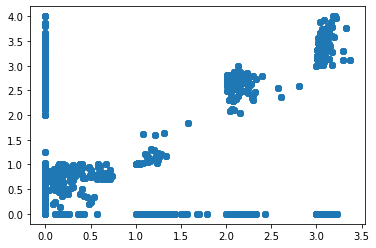

In [112]:
import numpy as np
plt.scatter(X,y)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)


In [137]:
kmeans.fit(X_test, y_test)

KMeans(n_clusters=5)

In [138]:
predicted_clusters = kmeans.predict(X_test)

In [139]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_


Text(0.5, 1.0, 'Associated Conditions with Symptoms')

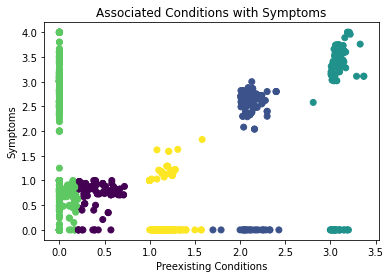

In [140]:
plt.scatter(X_test, y_test, c = labels, cmap='viridis')
plt.xlabel('Preexisting Conditions')
plt.ylabel('Symptoms')
plt.title('Associated Conditions with Symptoms')
# need to provide legend? 